In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import itertools as it
import pickle as pkl
import os
from copy import copy
import warnings
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import seaborn as sns

import json
import requests
# from IPython.display import display, HTML
# import bbknn
import time

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)

In [3]:
prefix = '/data/xyzeq/'

### Load in the data

In [4]:
adata_xyz = sc.read_h5ad(prefix + 'box.data4/all_batches_mouse_only_processed.h5ad')

Adjust `var` names:

In [5]:
adata_xyz.var_names = [i[5:] for i in adata_xyz.var_names]
adata_xyz.var_names_make_unique()

In [6]:
new_raw = adata_xyz.raw.to_adata()
new_raw.var_names = [i[5:] for i in new_raw.var_names]
new_raw.var_names_make_unique()
adata_xyz.raw = new_raw

### Visualize

**12OCT20** _(GH)_: Remade as tSNE for Youjin.

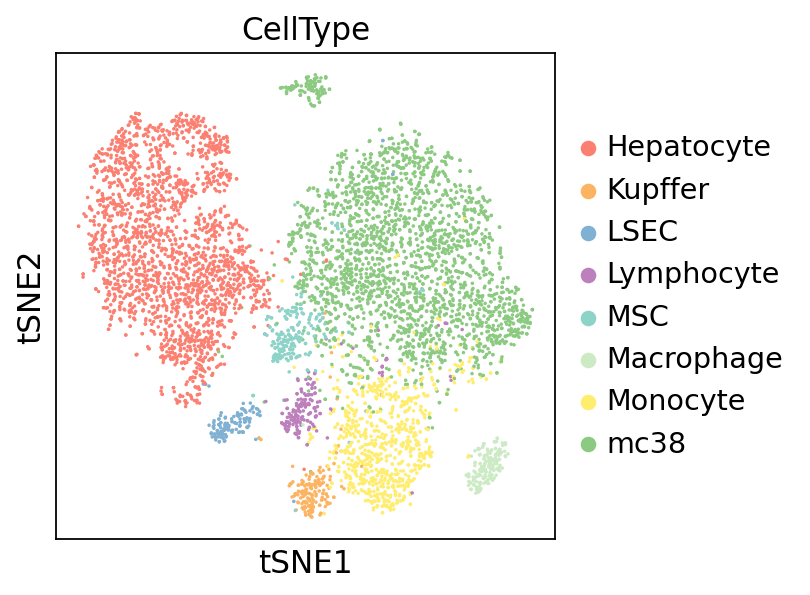

In [8]:
# 12OCT20 these are not the labels we're using anymore (changed macrophages for myeloid, but whatever)
sc.pl.tsne(adata_xyz,color=['CellType'], size=10)

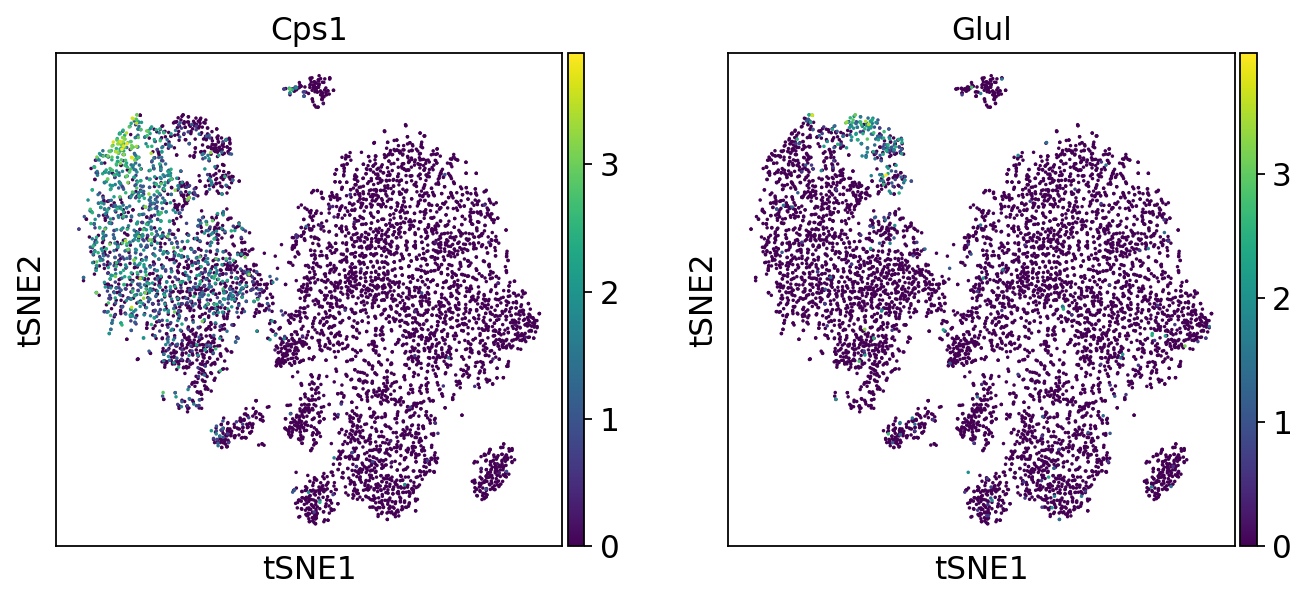

In [9]:
sc.pl.tsne(adata_xyz,color=['Cps1','Glul'], size=10)

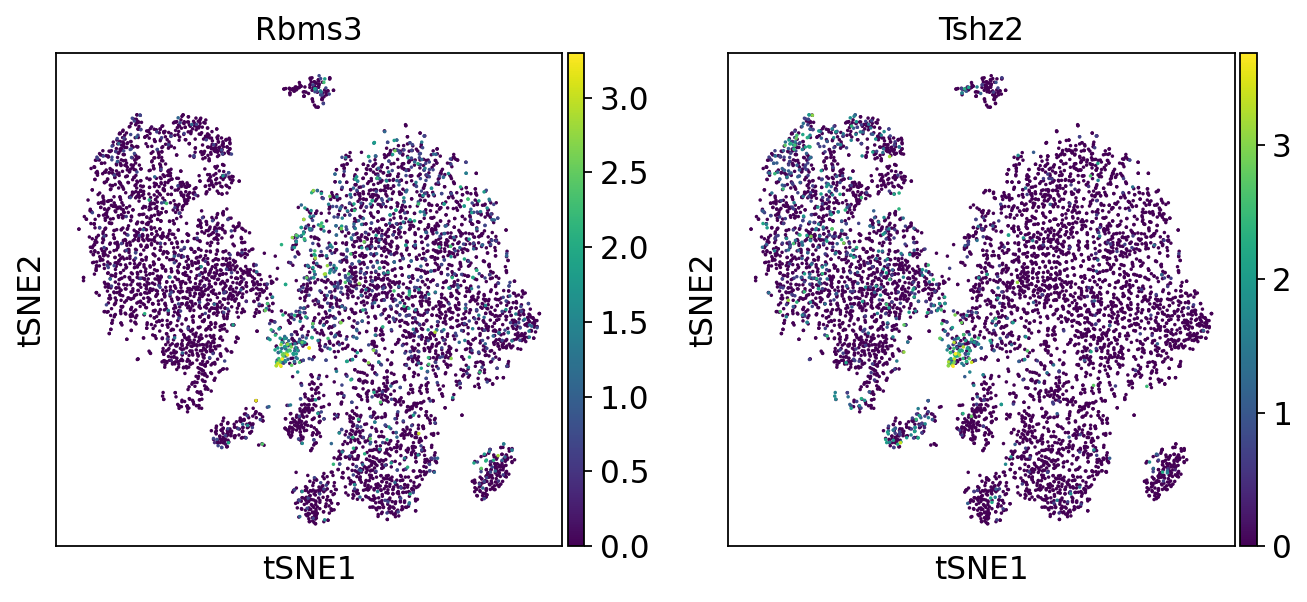

In [10]:
sc.pl.tsne(adata_xyz,color=['Rbms3','Tshz2'], size=10)

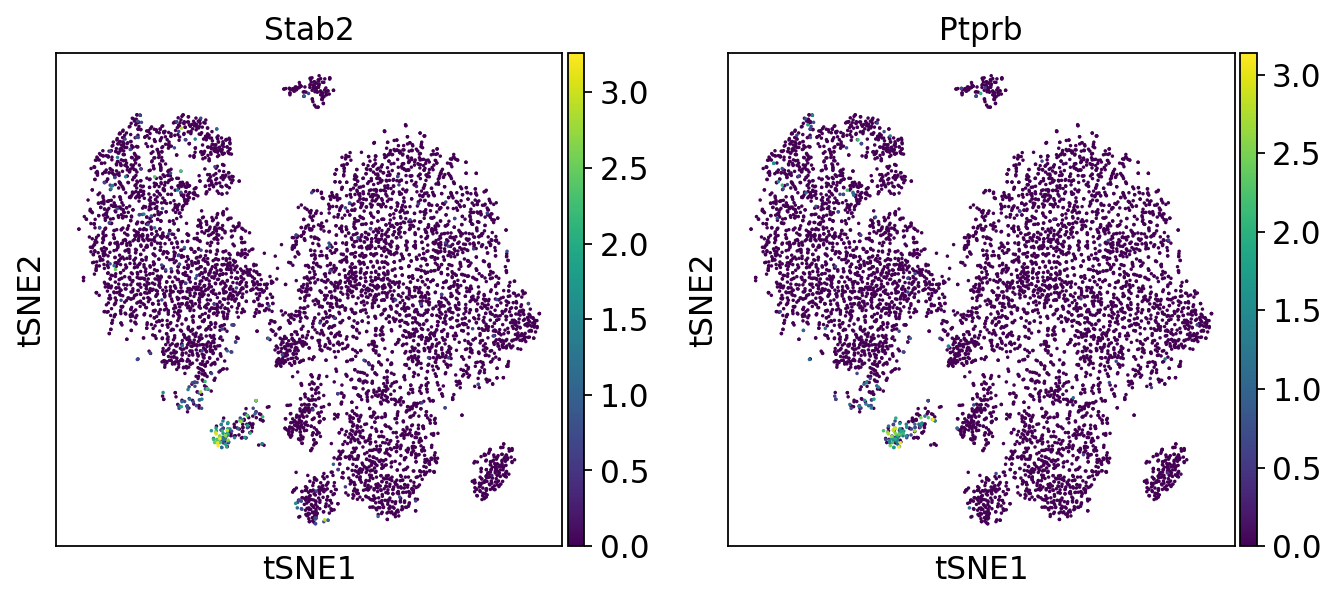

In [11]:
sc.pl.tsne(adata_xyz,color=['Stab2','Ptprb'], size=10)

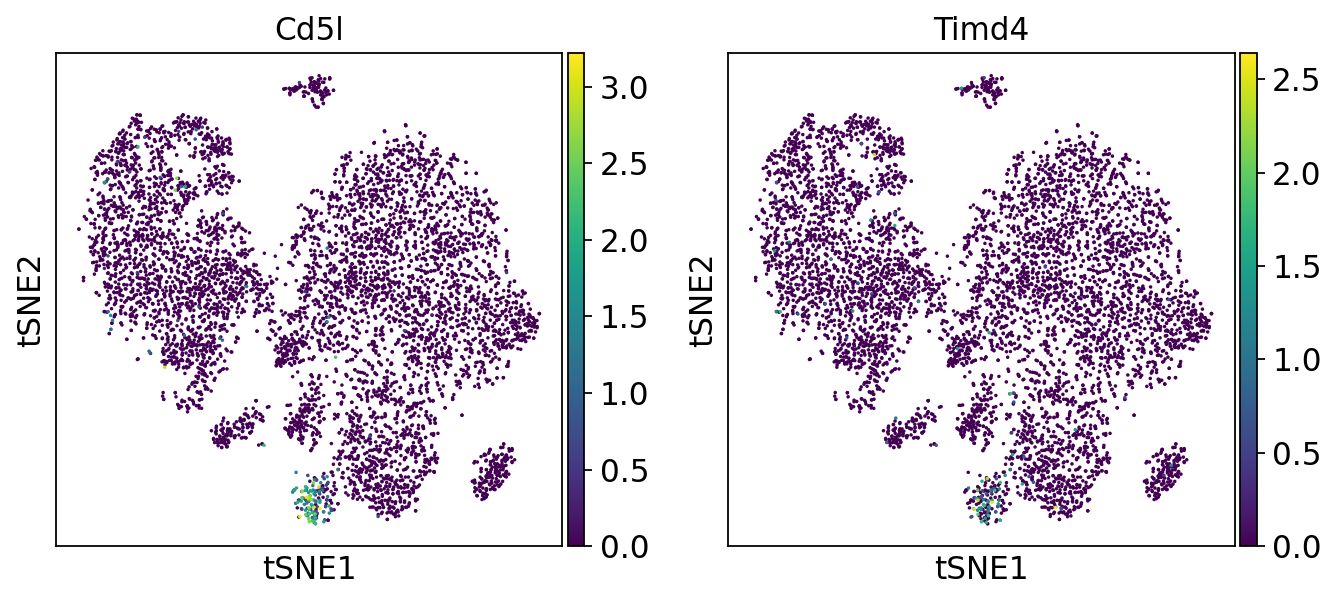

In [12]:
sc.pl.tsne(adata_xyz,color=['Cd5l','Timd4'], size=10)

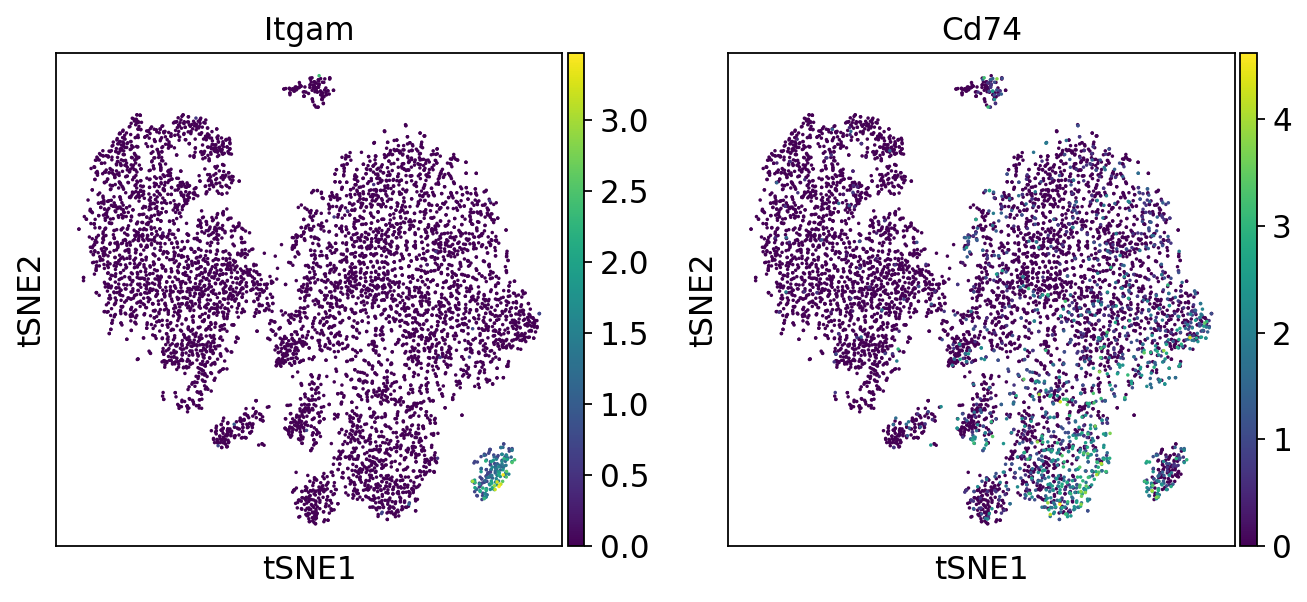

In [13]:
sc.pl.tsne(adata_xyz,color=['Itgam', 'Cd74'], size=10)

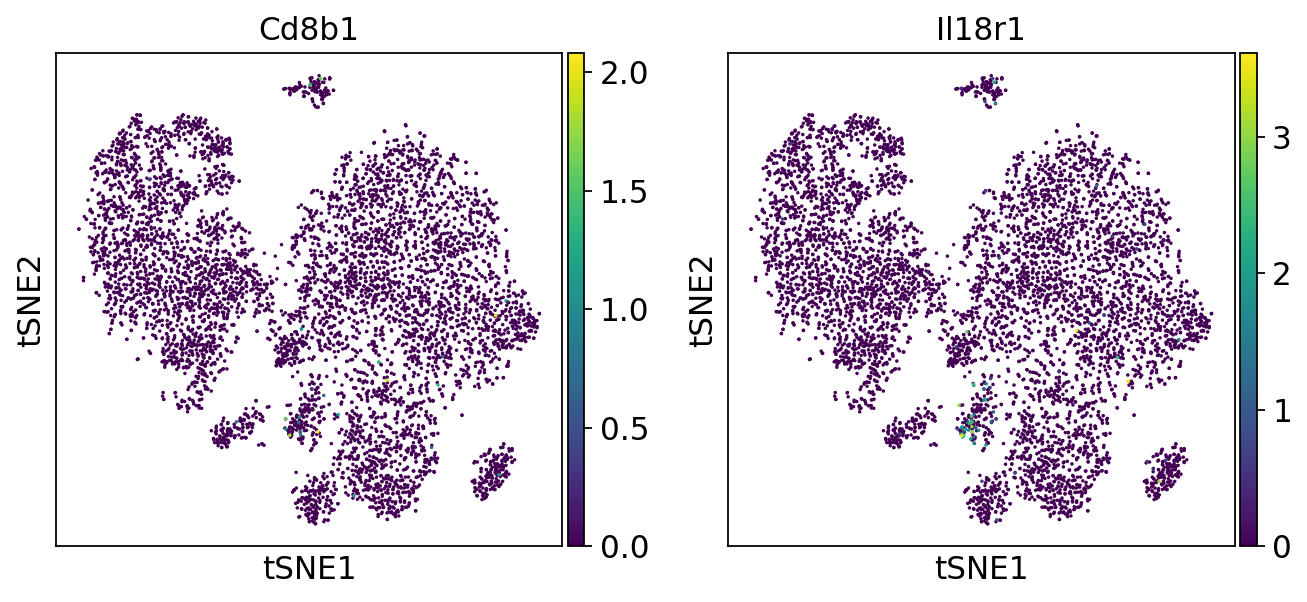

In [14]:
sc.pl.tsne(adata_xyz,color=['Cd8b1', 'Il18r1'], size=10)

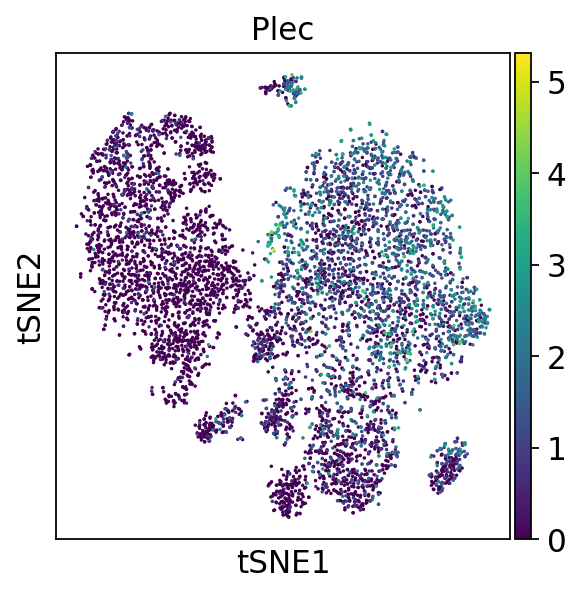

In [15]:
sc.pl.tsne(adata_xyz,color=['Plec'], size=10)

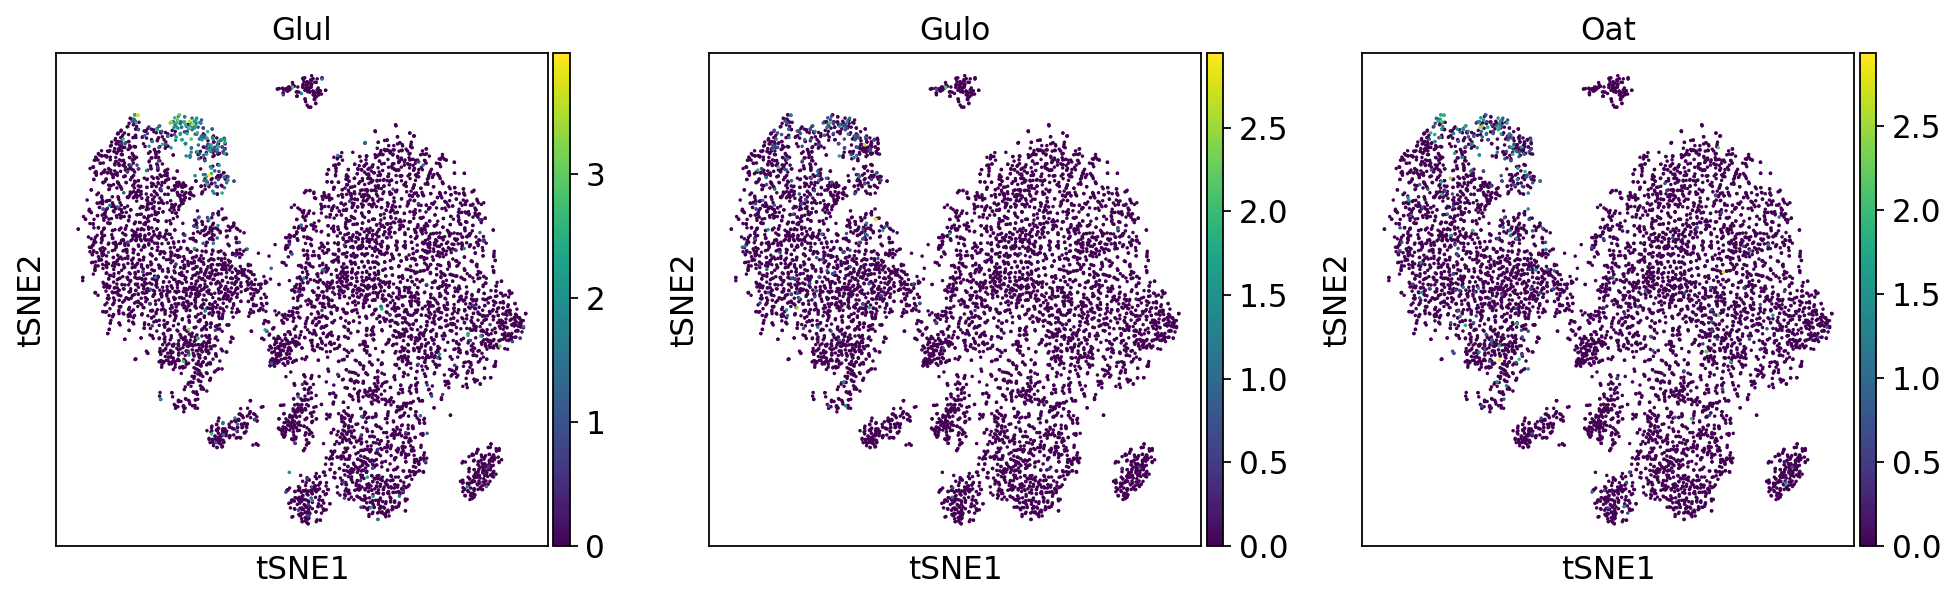

In [16]:
sc.pl.tsne(adata_xyz,color=['Glul', 'Gulo', 'Oat'], size=10)

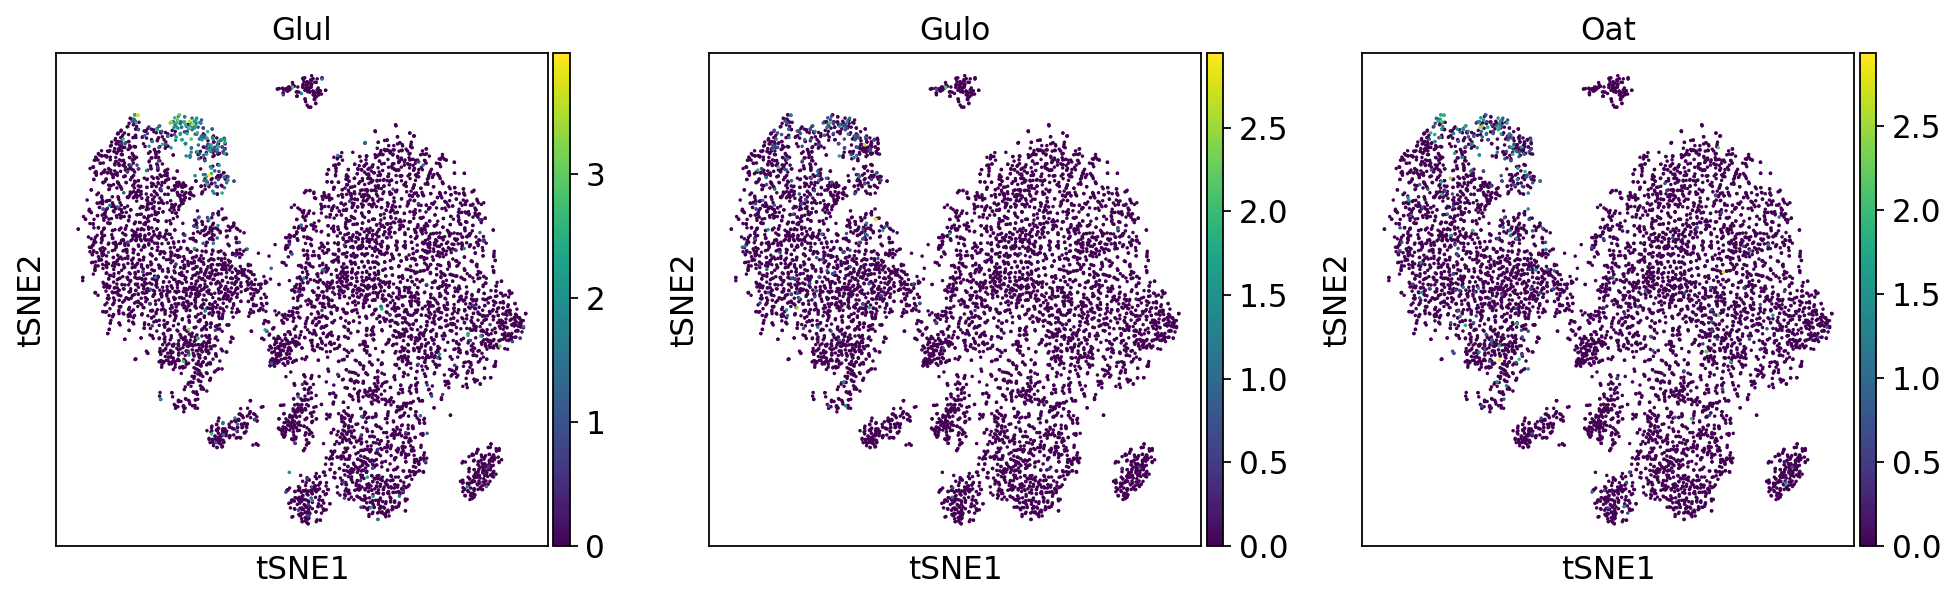

In [17]:
sc.pl.tsne(adata_xyz,color=['Glul', 'Gulo', 'Oat'], size=10)

In [18]:
# 12OCT20 these are not the labels we're using anymore (changed macrophages for myeloid, but whatever)
gene_sets = {
    'Hepatocytes': ['Cps1','Glul'],
    'MSCs': ['Rbms3','Tshz2'],
    'LSECs': ['Stab2','Ptprb'],
    'Kupffer': ['Cd5l','Timd4'],
    'Macrophages': ['Itgam', 'Cd74'],
    'Lymphocytes': ['Cd8b1', 'Il18r1'],
    'MC38': ['Plec'],
    'Pericentral': ['Glul', 'Gulo', 'Oat']
}

In [ ]:
for gene_set in gene_sets:
    genes = gene_sets[gene_set]
    sc.pl.tsne(adata_xyz, color=genes, size=10, save=".%s.svg" % '.'.join(gene_sets[gene_set]), return_fig=False, show=False)
plt.close()